In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
plt.style.use('styleNB.mplstyle')

In [2]:
# load the new construct data
df_filtered = pd.read_csv('../../data/processed_3D_tracking/20240607_compiled_galvaninKOlines_charged-eGFPtracking.csv')

# Include the rescue data
f_rescue_filtered = '../../data/processed_3D_tracking/20240424_compiled_galvaninKOlines_rescue_tracking_GFPplus.csv'
df_gfp = pd.read_csv(f_rescue_filtered)
df_gfp = df_gfp[['cell', 'frame', 'x', 'y', 'z',
       'celltype', 'E_V_cm', 'date', 'trial', 'user']]

df_concat = pd.concat([df_filtered, df_gfp], ignore_index = True)

# remove cells at the periphery
df_concat_ = pd.DataFrame()
for g, d_ in df_concat.groupby(['celltype', 'E_V_cm', 'date', 'trial', 'user', 'cell']):
    if np.any(d_.z > 290):
        continue
    elif np.any(d_.z < 10):
        continue
    
    # Append the row to the DataFrame using concat
    df_concat_ = pd.concat([df_concat_, d_], ignore_index=True)

In [3]:
###############################
# directionality calculation
# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
###############################
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)) 


color_dict = {'dHL60KW': '#B8BABC',
              'dHL60TMEM154KO': (1.0, 0.4980392156862745, 0.054901960784313725),
              'dHL60TMEM154KO-clone1galvanin-GFP-HA': (0.17254901960784313,  0.6274509803921569, 0.17254901960784313),
             'dHL60TMEM154KO-clone1+9GFP-galvanin-HA': (0.12156862745098039,0.4666666666666667, 0.7058823529411765),
             'dHL60TMEM154KO-clone1-30GFP-galvanin-HA': 'k'}

## Calculate average speed along electric field direction

In [4]:
# I want plots with equally spaced bins across all the cell lines. I need to determine the data range first.; otherwise this can be ignored.

count = 0
for E, df_temp in df_concat_.groupby('E_V_cm'):
    if E == 5:
        continue
    if E == 1:
        continue
        
    count_int_30 = 0
    count_cell_30 = 0
    for g, d in df_temp[df_temp.celltype == 'dHL60TMEM154KO-clone1-30GFP-galvanin-HA'].groupby(['celltype',  'E_V_cm'],  sort=False):
        dot_30 = []
        for cell, d_ in d.groupby(['date', 'trial', 'user', 'cell']):
            if len(d_.frame.unique()) > 10:
                tot = 0
                for t in np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]:
                    vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                              d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0]]
                    tot += vec_t1[0]
                    count_int_30 += 1
                    
                dot_30 = np.append(dot_30,tot/len(np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]))
                
            count_cell_30 += 1
    
    count_int_9 = 0
    count_cell_9 = 0
    for g, d in df_temp[df_temp.celltype == 'dHL60TMEM154KO-clone1+9GFP-galvanin-HA'].groupby(['celltype',  'E_V_cm'],  sort=False):
        dot_9 = []
        for cell, d_ in d.groupby(['date', 'trial', 'user', 'cell']):
            if len(d_.frame.unique()) > 10:
                tot = 0
                for t in np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]:
                    vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                              d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0]]
                    tot += vec_t1[0]
                    count_int_9 += 1
                    
                dot_9 = np.append(dot_9,tot/len(np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]))
                
            count_cell_9 += 1
            
    count_int_res = 0
    count_cell_res = 0
    for g, d in df_temp[df_temp.celltype == 'dHL60TMEM154KO-clone1galvanin-GFP-HA'].groupby(['celltype',  'E_V_cm'],  sort=False):
        dot_res = []
        for cell, d_ in d.groupby(['date', 'trial', 'user', 'cell']):
            if len(d_.frame.unique()) > 10:
                tot = 0
                for t in np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]:
                    vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                              d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0]]
                    tot += vec_t1[0]
                    count_int_res += 1
                    
                dot_res = np.append(dot_res,tot/len(np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]))

            count_cell_res += 1

    
    count += 1


### Plot and statistics

0
('dHL60TMEM154KO-clone1-30GFP-galvanin-HA', 0)
-30GFP-galvanin-HA
num. cells:  441
num. intervals:  3776
('dHL60TMEM154KO-clone1+9GFP-galvanin-HA', 0)
+9GFP-galvanin-HA
num. cells:  286
num. intervals:  2440
('dHL60TMEM154KO-clone1galvanin-GFP-HA', 0)
rescue
num. cells:  797
num. intervals:  6987
30_rescue MannwhitneyuResult(statistic=174926.0, pvalue=0.8927767173564832)
9_rescue MannwhitneyuResult(statistic=109250.0, pvalue=0.2982081003647242)
9_30 MannwhitneyuResult(statistic=60798.0, pvalue=0.4129897018309028)
1
('dHL60TMEM154KO-clone1-30GFP-galvanin-HA', 1)
-30GFP-galvanin-HA
num. cells:  463
num. intervals:  3973
('dHL60TMEM154KO-clone1+9GFP-galvanin-HA', 1)
+9GFP-galvanin-HA
num. cells:  266
num. intervals:  2265
('dHL60TMEM154KO-clone1galvanin-GFP-HA', 1)
rescue
num. cells:  691
num. intervals:  6057
30_rescue MannwhitneyuResult(statistic=174566.0, pvalue=0.008517597098989313)
9_rescue MannwhitneyuResult(statistic=60886.0, pvalue=5.635976242590617e-16)
9_30 MannwhitneyuResult(

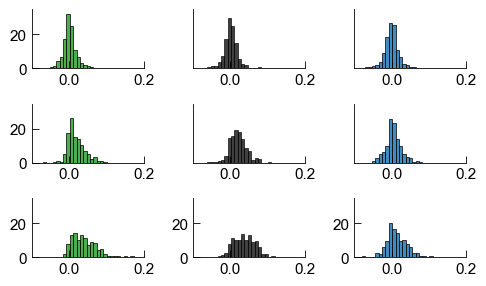

In [13]:
cell_30 = 'dHL60TMEM154KO-clone1-30GFP-galvanin-HA'
cell_9 = 'dHL60TMEM154KO-clone1+9GFP-galvanin-HA'
cell_res = 'dHL60TMEM154KO-clone1galvanin-GFP-HA'

########################
# generate histograms with equal-sized bins
########################

# Determine the fixed bin width
bin_width = 0.009#6  # Adjust this value to your desired bin width

# Determine the common range for all histograms
data_min = min(np.min(dot_30/(3.0*60)), np.min(dot_9/(3.0*60)),  np.min(dot_res/(3.0*60)))  
data_max = max(np.max(dot_30/(3.0*60)), np.max(dot_9/(3.0*60)),  np.max(dot_res/(3.0*60)))

# Create bin edges based on the fixed bin width
bins = np.arange(data_min, data_max + bin_width, bin_width)

########################
# plots
########################

fig, axs = plt.subplots(nrows=3, ncols = 3, figsize = (5, 3))

count = 0
for E, df_temp in df_concat_.groupby('E_V_cm'):
    print(E)
    if E == 5:
        continue
    # if E == 1:
    #     continue
        
    count_int_30 = 0
    count_cell_30 = 0
    for g, d in df_temp[df_temp.celltype == 'dHL60TMEM154KO-clone1-30GFP-galvanin-HA'].groupby(['celltype',  'E_V_cm'],  sort=False):
        print(g)

        dot_30 = []
        for cell, d_ in d.groupby(['date', 'trial', 'user', 'cell']):
            if len(d_.frame.unique()) > 10:
                tot = 0
                for t in np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]:
                    vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                              d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0]]
                    tot += vec_t1[0]
                    count_int_30 += 1
                    
                dot_30 = np.append(dot_30,tot/len(np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]))
                
            count_cell_30 += 1
    print('-30GFP-galvanin-HA')
    print('num. cells: ', count_cell_30)
    print('num. intervals: ', count_int_30)

    
    count_int_9 = 0
    count_cell_9 = 0
    for g, d in df_temp[df_temp.celltype == 'dHL60TMEM154KO-clone1+9GFP-galvanin-HA'].groupby(['celltype',  'E_V_cm'],  sort=False):
        print(g)

        dot_9 = []
        for cell, d_ in d.groupby(['date', 'trial', 'user', 'cell']):
            if len(d_.frame.unique()) > 10:
                tot = 0
                for t in np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]:
                    vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                              d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0]]
                    tot += vec_t1[0]
                    count_int_9 += 1
                    
                dot_9 = np.append(dot_9,tot/len(np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]))
                
            count_cell_9 += 1
            
    print('+9GFP-galvanin-HA')
    print('num. cells: ', count_cell_9)
    print('num. intervals: ', count_int_9)
    
    count_int_res = 0
    count_cell_res = 0
    for g, d in df_temp[df_temp.celltype == 'dHL60TMEM154KO-clone1galvanin-GFP-HA'].groupby(['celltype',  'E_V_cm'],  sort=False):
        print(g)
        
        dot_res = []
        for cell, d_ in d.groupby(['date', 'trial', 'user', 'cell']):
            if len(d_.frame.unique()) > 10:
                tot = 0
                for t in np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]:
                    vec_t1 = [d_[d_.frame == t].x.values[0] - d_[d_.frame == t-3].x.values[0],
                              d_[d_.frame == t].y.values[0] - d_[d_.frame == t-3].y.values[0]]
                    tot += vec_t1[0]
                    count_int_res += 1
                    
                dot_res = np.append(dot_res,tot/len(np.arange(d_.frame.min(),d_.frame.max(), 3)[1:]))

            count_cell_res += 1
    print('rescue')
    print('num. cells: ', count_cell_res)
    print('num. intervals: ', count_int_res)    

    df_treat = dot_30
    df_control = dot_res
    print('30_rescue', scipy.stats.mannwhitneyu(df_treat, df_control))   
    
    df_treat = dot_9
    df_control = dot_res
    print('9_rescue', scipy.stats.mannwhitneyu(df_treat, df_control))   

    df_treat = dot_9
    df_control = dot_30
    print('9_30', scipy.stats.mannwhitneyu(df_treat, df_control))   
            
    if count == 0:

        axs[count, 1].hist(dot_30/(3.0*60), bins, density=True, 
                       alpha=0.75, color = color_dict[cell_30], linewidth=0.6,edgecolor='black',  label = 'rescue\n(galvanin-GFP)')
        
        # axs[count, 1].hist(dot_30/(3.0*60), bins, density=True, 
        #                alpha=0.3, color = color_dict[cell_30], linewidth=0.6,edgecolor='black',  label = 'wild-type')

        # axs[count, 2].hist(dot_30/(3.0*60), bins, density=True, 
        #                alpha=0.3, color = color_dict[cell_30], linewidth=0.6,edgecolor='black',  label = 'wild-type')

        axs[count, 2].hist(dot_9/(3.0*60), bins, density=True, 
                       alpha=0.85, color = color_dict[cell_9], linewidth=0.6, edgecolor='black', label = '+9GFP-galvanin')

        axs[count, 0].hist(dot_res/(3.0*60), bins, density=True, 
                       alpha=0.85, color = color_dict[cell_res], linewidth=0.6, edgecolor='black', label = '-42GFP-galvanin')
    else:
        axs[count, 1].hist(dot_30/(3.0*60), bins, density=True, 
                   alpha=0.75, color = color_dict[cell_30],edgecolor='black',  linewidth=0.6)
        
        # axs[count, 1].hist(dot_30/(3.0*60), bins, density=True, 
        #            alpha=0.3, color = color_dict[cell_30],edgecolor='black',  linewidth=0.6)

        # axs[count, 2].hist(dot_30/(3.0*60), bins, density=True, 
        #            alpha=0.3, color = color_dict[cell_30],edgecolor='black',  linewidth=0.6)

        axs[count, 2].hist(dot_9/(3.0*60), bins, density=True, 
                       alpha=0.85, color = color_dict[cell_9],edgecolor='black',  linewidth=0.6)

        axs[count, 0].hist(dot_res/(3.0*60), bins, density=True, 
                       alpha=0.85, color = color_dict[cell_res],edgecolor='black',  linewidth=0.6)
    
    count += 1


axs = axs.ravel()
for ax_ in axs:
    ax_.set_xlim(-0.1,0.2)
    ax_.set_ylim(0,35)
    ax_.set_yticks([0,20])

    
for ax_ind in [1,2,4,5]:
    axs[ax_ind].yaxis.set_visible(False)
        
plt.tight_layout()

plt.savefig('../../figures/Figure4_supplemental_charged_GFP_speedalongEfield.pdf')